# Analyse des Dossiers de Patients Atteints de Cancer

Ce notebook contient une analyse complète des dossiers de patients atteints de cancer, incluant :
- Chargement des données
- Prétraitement et nettoyage des données
- Vectorisation TF-IDF
- Entraînement d'un modèle Random Forest
- Évaluation du modèle
- Visualisations des résultats

In [8]:
# Installation des packages nécessaires
%pip install pandas numpy scikit-learn matplotlib seaborn

# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Pour afficher les graphiques dans le notebook
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Pour afficher les graphiques dans le notebook
%matplotlib inline

**Important** : Après l'installation des packages :
1. Redémarrez le kernel du notebook (Menu Kernel -> Restart)
2. Puis réexécutez toutes les cellules dans l'ordre

In [9]:
# Chargement des données depuis le fichier local
df = pd.read_csv('china_cancer_patients_synthetic.csv')

# Affichage des premières lignes et informations sur le dataset
print("\nAperçu des données :")
print(df.head())
print("\nInformations sur le dataset :")
print(df.info())


Aperçu des données :
   PatientID Gender  Age   Province Ethnicity TumorType CancerStage  \
0  CHN-00001   Male   32      Hunan       Han      Lung           I   
1  CHN-00002   Male   66    Sichuan       Han      Lung          IV   
2  CHN-00003  Other   26  Guangdong       Han      Lung         III   
3  CHN-00004  Other   35      Anhui    Uyghur    Breast         III   
4  CHN-00005   Male   32  Guangdong       Han   Stomach          II   

  DiagnosisDate  TumorSize Metastasis TreatmentType SurgeryDate  \
0    2010-07-24        8.2         No     Radiation  2010-08-24   
1    2015-01-03        9.5        Yes  Chemotherapy  2015-03-24   
2    2022-03-26        9.3        Yes       Surgery  2022-07-14   
3    2019-06-19        7.7         No       Surgery  2019-08-27   
4    2012-02-07        7.3         No  Chemotherapy         NaN   

   ChemotherapySessions  RadiationSessions SurvivalStatus  FollowUpMonths  \
0                     0                 23          Alive              

In [10]:
# Nettoyage des données
def clean_text(text):
    if isinstance(text, str):
        # Conversion en minuscules
        text = text.lower()
        # Suppression des caractères spéciaux
        text = re.sub(r'[^\w\s]', '', text)
        # Suppression des espaces multiples
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    return ''

# Application du nettoyage aux colonnes textuelles
# Note: Ajustez les noms des colonnes en fonction de votre dataset
text_columns = ['description']  # Modifiez selon vos colonnes
for col in text_columns:
    if col in df.columns:
        df[f'{col}_clean'] = df[col].apply(clean_text)

# Prétraitement des données

# Traitement des valeurs manquantes
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

# Remplacement des valeurs manquantes
df['AlcoholUse'] = df['AlcoholUse'].fillna('Unknown')
df['GeneticMutation'] = df['GeneticMutation'].fillna('None')
df['Comorbidities'] = df['Comorbidities'].fillna('None')

# Encodage des variables catégorielles
cat_columns = ['Gender', 'Province', 'Ethnicity', 'TumorType', 'CancerStage', 
               'Metastasis', 'TreatmentType', 'SmokingStatus', 'AlcoholUse', 
               'GeneticMutation']

# Utilisation de get_dummies pour l'encodage one-hot
df_encoded = pd.get_dummies(df[cat_columns])

# Ajout des colonnes numériques
num_columns = ['Age', 'TumorSize', 'ChemotherapySessions', 'RadiationSessions', 'FollowUpMonths']
df_final = pd.concat([df_encoded, df[num_columns]], axis=1)

print("\nDimensions des données après prétraitement:", df_final.shape)

Valeurs manquantes par colonne :
PatientID                  0
Gender                     0
Age                        0
Province                   0
Ethnicity                  0
TumorType                  0
CancerStage                0
DiagnosisDate              0
TumorSize                  0
Metastasis                 0
TreatmentType              0
SurgeryDate             5673
ChemotherapySessions       0
RadiationSessions          0
SurvivalStatus             0
FollowUpMonths             0
SmokingStatus              0
AlcoholUse              5921
GeneticMutation         7200
Comorbidities           3715
dtype: int64

Dimensions des données après prétraitement: (10000, 54)


In [12]:
# Préparation des données pour le modèle
X = df_final  # Toutes les colonnes encodées
y = (df['SurvivalStatus'] == 'Deceased').astype(int)  # 1 pour 'Deceased', 0 pour 'Alive'

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensions des données d'entraînement:", X_train.shape)
print("Dimensions des données de test:", X_test.shape)
print("\nDistribution de la cible:")
print(y.value_counts(normalize=True))

# Préparation des données pour le modèle
X = df_final  # Toutes les colonnes encodées
y = (df['SurvivalStatus'] == 'Deceased').astype(int)  # 1 pour 'Deceased', 0 pour 'Alive'

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensions des données d'entraînement:", X_train.shape)
print("Dimensions des données de test:", X_test.shape)

Dimensions des données d'entraînement: (8000, 54)
Dimensions des données de test: (2000, 54)

Distribution de la cible:
SurvivalStatus
0    0.779
1    0.221
Name: proportion, dtype: float64
Dimensions des données d'entraînement: (8000, 54)
Dimensions des données de test: (2000, 54)


In [13]:
# Création et entraînement du modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test)

In [14]:
# Calcul des métriques d'évaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Métriques d'évaluation :")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

Métriques d'évaluation :
Accuracy: 0.777
Precision: 0.767
Recall: 0.777
F1-score: 0.771


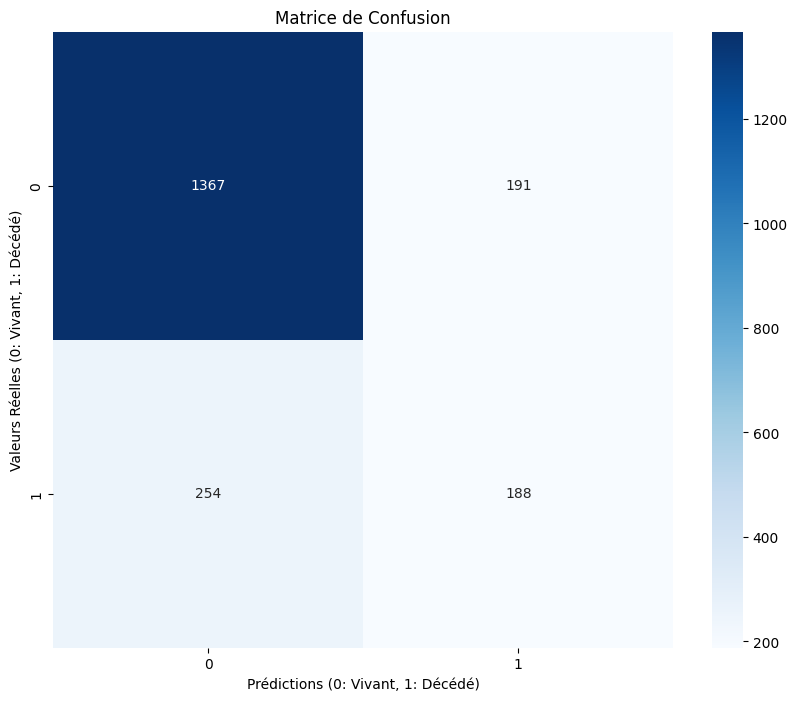

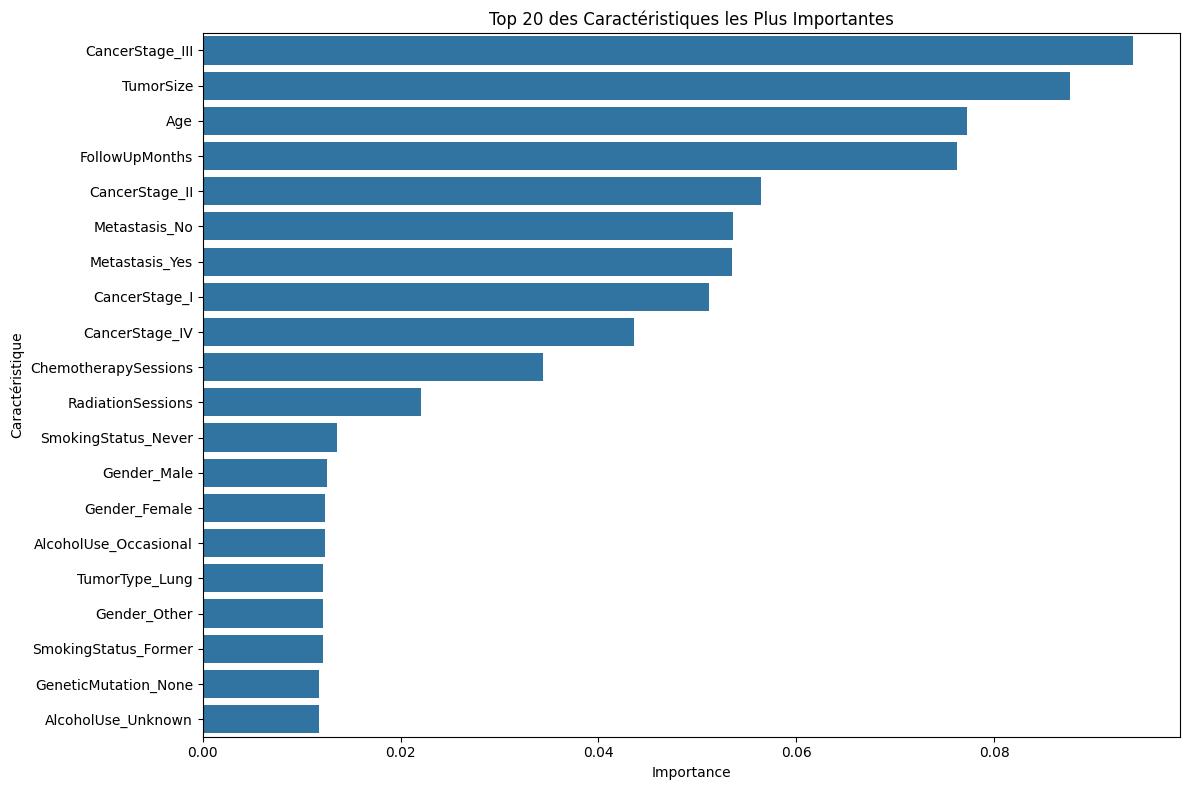

In [15]:
# Matrice de confusion
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions (0: Vivant, 1: Décédé)')
plt.ylabel('Valeurs Réelles (0: Vivant, 1: Décédé)')
plt.show()

# Importance des caractéristiques
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
})

# Affichage des 20 caractéristiques les plus importantes
plt.figure(figsize=(12, 8))
top_features = feature_importance.nlargest(20, 'importance')
sns.barplot(data=top_features, x='importance', y='feature')
plt.title('Top 20 des Caractéristiques les Plus Importantes')
plt.xlabel('Importance')
plt.ylabel('Caractéristique')
plt.tight_layout()
plt.show()